# De werkelijke coronacijfers 

Gemaakt door: Juliette Budelman, Marijn van Hest, Tim van Nieuwkerk, Siebe Tolsma

Het is nu ruim een jaar na de eerste coronauitbraak en we zijn benieuwd naar de werkelijke coronacijfers. Zijn de verschillende coronagolven te herkennen? Is er een verband tussen het aantal besmettingen en het aantal doden? Welke landen hebben het coronavirus beter onder controle en is dit afhankelijk van het continent waar het land op ligt? Wat is de invloed van het coronavirus op het toerisme en het aantal faillissementen in Nederland? In deze blogpost geven we antwoord op deze vragen met behulp van openbare databronnen en 'interactieve' visualisaties.

## 1. Importeren libraries
In dit hoofdstuk importeren we de benodigde libraries. 'Requests' wordt gebruikt voor het verbinden en binnenhalen van data via API's. 'Pandas', 'Numpy' en 'Scipy.stats' worden vooral gebruikt voor databewerking en het inladen van csv bestanden. 'Matplotlib', 'Seaborn' en 'Ipywidgets' worden gebruikt om 'interactieve' visualisaties te creeëren.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np 
from scipy.stats import linregress
import ipywidgets
from ipywidgets import interactive
from ipywidgets import Button, Layout

## 2. Verband tussen aantal besmettingen en aantal doden per land
In dit hoofdstuk wordt het verband tussen het aantal besmettingen en het aantal doden per land weergegeven. Er is onderscheidt gemaakt tussen het continent en het aantal inwoners.

### 2.1 Inladen gegevens en exploratory data analysis
Allereerst wordt er een API ingeladen. Deze API is afkomstig van COVID19 API (https://covid19api.com/). Deze API is gebouwd door Kyle Redelinghuys en de data is afkomstig van Johns Hopkins CSSE. Uit deze API kunnen verschillende gegevens worden opgehaald en dat gaat met een aantal parameters. De belangrijkste parameters zijn 'summary', 'countries', 'day one' en 'by country'. Een volledig overzicht is te vinden op de website. Wij gebruiken de 'summary' command door deze achter de API-link te plaatsen. 

Na het inladen geven we de eerste 5 regels weer die ons een indruk geven van de data.

In [2]:
url_corona_country = 'https://api.covid19api.com/summary'
r = requests.get(url_corona_country)
dict = r.json()['Countries']
df_corona_country = pd.DataFrame.from_dict(dict)
df_corona_country.head()

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date,Premium
0,e553158d-bdaa-4e96-9ba3-feb24c9bb4dd,Afghanistan,AF,afghanistan,0,55759,0,2446,0,49347,2021-03-03T18:22:36.459Z,{}
1,5c7a828f-783b-4df9-ab8e-605c21c99b04,Albania,AL,albania,0,108823,0,1835,0,71173,2021-03-03T18:22:36.459Z,{}
2,bc96fa26-88c3-4b70-925a-31488a512e70,Algeria,DZ,algeria,0,113430,0,2991,0,78377,2021-03-03T18:22:36.459Z,{}
3,691eae68-81f8-4281-b721-577114282b38,Andorra,AD,andorra,0,10908,0,110,0,10501,2021-03-03T18:22:36.459Z,{}
4,31967c1d-22e5-4976-8f6a-91a968d8dfe8,Angola,AO,angola,0,20882,0,510,0,19410,2021-03-03T18:22:36.459Z,{}


We hebben niet alle kolommen nodig, dus selecteren we alleen de benodigde kolommen (Country, CountryCode, TotalConfirmed, TotalDeaths en TotalRecovered).

Vervolgens bekijken we de informatie per kolom (eventueel missende waarden en dtype). Het blijkt dat er in deze dataset geen missende waarden zijn en dat de dtypes logisch zijn (Country en CountryCode zijn teksten en de coronacijfers zijn integers).

In [3]:
df_corona_country = df_corona_country[['Country', 'CountryCode', 'TotalConfirmed', 'TotalDeaths', 'TotalRecovered']]
df_corona_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         190 non-null    object
 1   CountryCode     190 non-null    object
 2   TotalConfirmed  190 non-null    int64 
 3   TotalDeaths     190 non-null    int64 
 4   TotalRecovered  190 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.5+ KB


In deze dataset zijn geen gegevens per continent beschikbaar, deze moeten we dus apart inladen. Dit doen we met een csv bestand van DataHub (https://datahub.io/JohnSnowLabs/country-and-continent-codes-list#resource-country-and-continent-codes-list-csv). Ook is de csv direct te openen met de link in de onderstaande code.

We bekijken de eerste vijf regels om een indruk te krijgen van de data.

In [4]:
df_continents = pd.read_csv('https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv')
df_continents.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


Ook zijn er geen gegevens over het aantal inwoners per land beschikbaar. Hiervoor hebben wij ook een csv ingeladen (https://datahub.io/JohnSnowLabs/population-figures-by-country). Deze csv is ook afkomstig van datahub en kan ook direct worden geopend via de link in de code hieronder.

We bekijken de eerste vijf regels om een indruk te krijgen van de data.

In [5]:
df_habitants = pd.read_csv('https://datahub.io/JohnSnowLabs/population-figures-by-country/r/population-figures-by-country-csv.csv')
df_habitants.head()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


We hebben maar gegevens van één jaartal nodig en we kiezen de meest recente (2016). Daarom nemen we de andere kolommen niet mee.

In [6]:
df_habitants = df_habitants[['Country_Code', 'Year_2016']]
df_habitants.head()

,Country_Code,Year_2016
0,ABW,104822.0
1,AFG,34656032.0
2,AGO,28813463.0
3,ALB,2876101.0
4,AND,77281.0


### 2.2 Samenvoegen gegevens
Vervolgens voegen we de drie datasets samen tot één dataset. Dit doen we in twee stappen (eerst coronacijfers met continenten, daarna met inwoners). We gebruiken hiervoor de .merge methode en voegen samen op basis van de landcodes. 

Vervolgens bekijken we de informatie per kolom. Het blijkt dat er één missende waarde is. Het blijkt het land Eritrea te zijn en we zoeken het aantal inwoners op (6.081.196). Vervolgens vullen we deze waarde in met de fillna() methode en checken we of de missende waarde is verdwenen. BRON

In [7]:
df_corona_country_merge = df_corona_country.merge(df_continents, left_on='CountryCode', right_on='Two_Letter_Country_Code')
df_corona_country_merge = df_corona_country_merge[['Country', 'CountryCode', 'TotalConfirmed', 'TotalDeaths', 'TotalRecovered', 'Continent_Name', 'Continent_Code', 'Two_Letter_Country_Code', 'Three_Letter_Country_Code']]
df_corona_country_merge = df_corona_country_merge.loc[:,~df_corona_country_merge.columns.duplicated()]

In [8]:
df_corona_country_merge_2 = df_corona_country_merge.merge(df_habitants, left_on='Three_Letter_Country_Code', right_on='Country_Code')
df_corona_country_merge_2 = df_corona_country_merge_2[['Country', 'CountryCode', 'TotalConfirmed', 'TotalDeaths', 'TotalRecovered', 'Continent_Name', 'Two_Letter_Country_Code', 'Three_Letter_Country_Code', 'Year_2016']]
df_corona_country_merge_2.rename(columns={'Year_2016':'Habitants'}, inplace=True)
df_corona_country_merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    193 non-null    object 
 1   CountryCode                193 non-null    object 
 2   TotalConfirmed             193 non-null    int64  
 3   TotalDeaths                193 non-null    int64  
 4   TotalRecovered             193 non-null    int64  
 5   Continent_Name             193 non-null    object 
 6   Two_Letter_Country_Code    193 non-null    object 
 7   Three_Letter_Country_Code  193 non-null    object 
 8   Habitants                  192 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 15.1+ KB


In [9]:
df_corona_country_merge_2[df_corona_country_merge_2['Habitants'].isnull()]

,Country,CountryCode,TotalConfirmed,TotalDeaths,TotalRecovered,Continent_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Habitants
57,Eritrea,ER,2884,7,2344,Africa,ER,ERI,NaN


In [10]:
df_corona_country_merge_2['Habitants'].fillna(6081196, inplace=True) 

In [11]:
df_corona_country_merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    193 non-null    object 
 1   CountryCode                193 non-null    object 
 2   TotalConfirmed             193 non-null    int64  
 3   TotalDeaths                193 non-null    int64  
 4   TotalRecovered             193 non-null    int64  
 5   Continent_Name             193 non-null    object 
 6   Two_Letter_Country_Code    193 non-null    object 
 7   Three_Letter_Country_Code  193 non-null    object 
 8   Habitants                  193 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 15.1+ KB


### 2.3 Verbanden visualiseren
Hieronder bekijken we de correlatie tussen een aantal van de variabelen in de tabel (TotalConfirmed, TotalDeaths, TotalRecoverd, Habitants). Het blijkt dat er een zeer sterke lineair verband is tussen het aantal besmettingen en het aantal doden. Ook is er een positief verband tussen het aantal besmettingen en het aantal herstelde patiënten en het aantal inwoners.

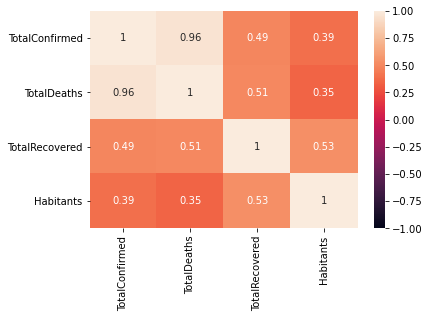

In [12]:
sns.heatmap(df_corona_country_merge_2.corr(), vmin=-1, vmax=1, annot=True)

plt.show()

Vervolgens willen we dit sterke verband laten zien in een spreidingsdiagram en willen we hierin een regressielijn laten zien. De regressielijn maken we met behulp van de linregress functie, welke als output onder andere het snijpunt en de richtingscoëfficient laat zien. 

Vervolgens maken we een scatterplot waarbij de regressielijn kan worden weergegeven of worden verborgen met een checkbox. Hiertoe is in de formule voor de regressielijn 'visible' gelijk gesteld aan 'x', de input van de checkbox.

In [13]:
res = linregress(df_corona_country_merge_2.TotalConfirmed, df_corona_country_merge_2.TotalDeaths)
res

LinregressResult(slope=0.018836000959226024, intercept=1893.496680005952, rvalue=0.9571420428256489, pvalue=9.74118723442621e-105, stderr=0.00041240368151083766)

In [14]:
checkbox1 = ipywidgets.Checkbox(value=True, description='Regressielijn')

def regressielijn(x):
    g = sns.relplot(data = df_corona_country_merge_2, x = 'TotalConfirmed', y = 'TotalDeaths', kind = 'scatter', hue = 'Continent_Name', size = 'Habitants')

    g.fig.suptitle('Verband tussen het aantal besmettingen en het aantal doden', y = 1.06)
    g.set(xlabel = 'Aantal besmettingen', ylabel = 'Aantal doden')
    
    fx = np.array([df_corona_country_merge_2.TotalConfirmed.min(), df_corona_country_merge_2.TotalConfirmed.max()])
    fy = res.intercept + res.slope * fx 
    plt.plot(fx, fy, '-', visible = x)

out = ipywidgets.interactive_output(regressielijn, {'x': checkbox1})
ipywidgets.VBox([checkbox1, out])

Conclusie: 
In de scatterplot is duidelijk te zien dat er een verband is tussen het aantal besmettingen en het aantal doden, aangezien de landen redelijk dichtbij de regressielijn liggen. Ook is te zien dat landen met meer inwoners over het algemeen meer besmettingen en doden hebben. Er lijkt geen verband te zijn tussen het aantal besmettingen en aantal doden per continent. De landen die rechts van de regressielijn liggen, doen het beter dan de landen die links van de regressielijn liggen. De oorzaken hiervoor zijn waarschijnlijk coronamaatregelen of algemene gezondheid, die per land verschillen.

Om dit verband verder te onderzoeken willen we de scatterplot per continent laten zien. Dit doen we met een dropdown, waarbij de lijst van continenten de input is. Vervolgens wordt de output van deze dropdown gebruikt om de 'Continent_Name' kolom te subsetten, waardoor de grafiek zich aanpast.

In [15]:
continentList = ['All']
continentList.extend(df_corona_country_merge_2.Continent_Name.unique())

continentW = ipywidgets.Dropdown(options = continentList)
countryW = ipywidgets.Dropdown()

@ipywidgets.interact(continent = continentW, country = countryW)
def print_city(continent, country):
    countriesList = ['All']
    countriesList.extend(df_corona_country_merge_2[df_corona_country_merge_2.Continent_Name == continent].Country.unique())
    countryW.options = countriesList
    
    if (continent == 'All'):
        df = df_corona_country_merge_2
    elif (country == 'All'):
        df = df_corona_country_merge_2[df_corona_country_merge_2.Continent_Name == continent]
    else:
        df = df_corona_country_merge_2[df_corona_country_merge_2.Country == country]
    
    g = sns.relplot(data = df, x = 'TotalConfirmed', y = 'TotalDeaths', kind = 'scatter', hue = 'Habitants')
    g.fig.suptitle('Verband tussen het aantal besmettingen en het aantal doden', y = 1.06)
    g.set(xlabel = 'Aantal besmettingen', ylabel = 'Aantal doden', ylim=[0, df_corona_country_merge_2.TotalDeaths.max()], xlim=[0, df_corona_country_merge_2.TotalConfirmed.max()])
    plt.show()

interactive(children=(Dropdown(description='continent', options=('All', 'Asia', 'Europe', 'Africa', 'North Ame…

Conclusie:
Er lijkt geen sterk verschil te zijn tussen de verschillende continenten. Alleen continent 'North America' lijkt meer doden te hebben per aantal besmettingen.

### 2.4 Voorspelling
Vervolgens kunnen we met behulp van de formule van de regressielijn een voorspelling doen van het aantal doden, gegeven het aantal besmettingen. Stel dat we willen weten hoeveel doden er zijn in Nederland als we alleen het aantal besmettingen weten, dan kunnen we de volgende formule gebruiken:

In [16]:
res.intercept+res.slope*df_corona_country_merge_2[df_corona_country_merge_2['Country'] == 'Netherlands']['TotalConfirmed']

124    22545.90972
Name: TotalConfirmed, dtype: float64

In [17]:
df_corona_country_merge_2[df_corona_country_merge_2['Country'] == 'Netherlands']['TotalDeaths']

124    15649
Name: TotalDeaths, dtype: int64

Uit deze formule blijkt dat Nederland minder coronadoden (15649) heeft dan de regressievoorspelling aangeeft (22546).

## 3. Verband tussen aantal besmettingen, toerisme en faillissementen

We zijn ook benieuwd naar de invloed van het aantal coronabesmettingen op het toerisme en faillissementen (nieuwsberichten).

### 3.1 Inladen coronagegevens en exploratory data analysis
Om het verband tussen deze variabelen weer te kunnen geven hebben we historische gegevens nodig van het aantal besmettingen. Deze laden we in via een API van MMediagroup (https://mmediagroup.fr/covid-19). Deze API is ontwikkeld door studenten uit Frankrijk (Monaco). Deze API heeft twee parameters, namelijk 'cases' en 'history'. Wij gebruiken de 'history' parameter, gevolgd door een bepaalde status ('confirmed' en 'deaths'). Zie de bovenstaande link voor een volledig overzicht van alle mogelijkheden.

Na het inladen bekijken we de eerste vijf regels om een indruk te krijgen van de data.

In [18]:
url_covid_nl_history_deaths = 'https://covid-api.mmediagroup.fr/v1/history?country=Netherlands&status=deaths'
r = requests.get(url_covid_nl_history_deaths)
dict = r.json()['All']
df_covid_nl_history_deaths = pd.DataFrame.from_dict(dict).reset_index()
df_covid_nl_history_deaths.head()

,index,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,dates
0,2020-01-22,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0
1,2020-01-23,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0
2,2020-01-24,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0
3,2020-01-25,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0
4,2020-01-26,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0


Het blijkt dat er geen missende waarden zijn en dat de dtypes logisch zijn bij de verschillende variabelen.

In [19]:
df_covid_nl_history_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                406 non-null    object
 1   country              406 non-null    object
 2   population           406 non-null    int64 
 3   sq_km_area           406 non-null    int64 
 4   life_expectancy      406 non-null    object
 5   elevation_in_meters  406 non-null    int64 
 6   continent            406 non-null    object
 7   abbreviation         406 non-null    object
 8   location             406 non-null    object
 9   iso                  406 non-null    int64 
 10  capital_city         406 non-null    object
 11  dates                406 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 38.2+ KB


De namen van de kolommmen 'index' en 'dates' zijn niet logisch gekozen en die passen we dus aan. Ook willen we de 'date' kolom omzetten naar een datatime datatype, aangezien dat voordelen oplevert bij het maken van visualisaties (x-as wordt automatisch aangepast naar de data). Ook blijkt dat de gegevens cumulatief zijn, maar wij willen ook de gegevens per dag. Tenslotte halen we de niet benodigde kolommen eruit. Daarna checken we of de bewerkingen zijn gelukt met .head() en .info().

In [20]:
df_covid_nl_history_deaths.rename(columns={'index':'date', 'dates':'deaths cumulative'}, inplace=True)
df_covid_nl_history_deaths['date']= pd.to_datetime(df_covid_nl_history_deaths['date'])
df_covid_nl_history_deaths['deaths per day'] = df_covid_nl_history_deaths['deaths cumulative'].diff().fillna(0)
df_covid_nl_history_deaths.drop(['population', 'sq_km_area', 'life_expectancy', 'elevation_in_meters', 'location', 'iso', 'capital_city'], axis=1, inplace=True)
df_covid_nl_history_deaths.head()

,date,country,continent,abbreviation,deaths cumulative,deaths per day
0,2020-01-22,Netherlands,Europe,NL,0,0.0
1,2020-01-23,Netherlands,Europe,NL,0,0.0
2,2020-01-24,Netherlands,Europe,NL,0,0.0
3,2020-01-25,Netherlands,Europe,NL,0,0.0
4,2020-01-26,Netherlands,Europe,NL,0,0.0


In [21]:
df_covid_nl_history_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               406 non-null    datetime64[ns]
 1   country            406 non-null    object        
 2   continent          406 non-null    object        
 3   abbreviation       406 non-null    object        
 4   deaths cumulative  406 non-null    int64         
 5   deaths per day     406 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 19.2+ KB


Naast het aantal doden per dag zijn we ook geïnteresseerd naar het aantal besmettingen per dag. Deze halen we uit dezelfde API als hierboven beschreven (https://mmediagroup.fr/covid-19).

Na het inladen bekijken we de eerste vijf regels om een indruk te krijgen van de data.

In [22]:
url_covid_nl_history_confirmed = 'https://covid-api.mmediagroup.fr/v1/history?country=Netherlands&status=confirmed'
r = requests.get(url_covid_nl_history_confirmed)
dict = r.json()['All']
df_covid_nl_history_confirmed = pd.DataFrame.from_dict(dict).reset_index()
df_covid_nl_history_confirmed.head()

,index,country,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,dates
0,2020-01-22,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0
1,2020-01-23,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0
2,2020-01-24,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0
3,2020-01-25,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0
4,2020-01-26,Netherlands,17035938,41526,78.3,30,Europe,NL,Western Europe,528,Amsterdam,0


Het blijkt dat er geen missende waarden zijn en dat de dtypes logisch zijn bij de verschillende variabelen.

In [23]:
df_covid_nl_history_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                406 non-null    object
 1   country              406 non-null    object
 2   population           406 non-null    int64 
 3   sq_km_area           406 non-null    int64 
 4   life_expectancy      406 non-null    object
 5   elevation_in_meters  406 non-null    int64 
 6   continent            406 non-null    object
 7   abbreviation         406 non-null    object
 8   location             406 non-null    object
 9   iso                  406 non-null    int64 
 10  capital_city         406 non-null    object
 11  dates                406 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 38.2+ KB


Net zoals bij het inladen van het aantal doden zijn de namen van de kolommmen 'index' en 'dates' niet logisch gekozen en die passen we dus aan. Ook blijkt dat de gegevens cumulatief zijn, maar wij willen ook de gegevens per dag. We hebben alleen de kolommen 'confirmed cumulative' en 'confirmed per day' nodig, aangezien de overige kolommen al aanwezig zijn in 'df_covid_nl_history_deaths'. Daarna checken we of de bewerkingen zijn gelukt met .head() en .info().

In [24]:
df_covid_nl_history_confirmed.rename(columns={'dates':'confirmed cumulative'}, inplace=True)
df_covid_nl_history_confirmed['confirmed per day'] = df_covid_nl_history_confirmed['confirmed cumulative'].diff().fillna(0)
df_covid_nl_history_confirmed = df_covid_nl_history_confirmed[['confirmed cumulative', 'confirmed per day']]
df_covid_nl_history_confirmed.head()

,confirmed cumulative,confirmed per day
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [25]:
df_covid_nl_history_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   confirmed cumulative  406 non-null    int64  
 1   confirmed per day     406 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.5 KB


### 3.2 Samenvoegen gegevens
De twee datasets die we hebben ingeladen willen we combineren tot één tabel om er analyses mee uit te kunnen voeren. Dat doen we met de functie concat(). De eerste vijf regels zijn weergegeven om het resultaat te laten zien.

In [26]:
df_covid_nl_history = pd.concat([df_covid_nl_history_deaths, df_covid_nl_history_confirmed], axis=1)
df_covid_nl_history.head()

,date,country,continent,abbreviation,deaths cumulative,deaths per day,confirmed cumulative,confirmed per day
0,2020-01-22,Netherlands,Europe,NL,0,0.0,0,0.0
1,2020-01-23,Netherlands,Europe,NL,0,0.0,0,0.0
2,2020-01-24,Netherlands,Europe,NL,0,0.0,0,0.0
3,2020-01-25,Netherlands,Europe,NL,0,0.0,0,0.0
4,2020-01-26,Netherlands,Europe,NL,0,0.0,0,0.0


### 3.3 Verbanden visualiseren (besmettingen en doden)
Om de bovenstaande tabel te visualiseren maken we een lijngrafiek. Er is een dropdown toegevoegd waarmee er kan worden geswitcht tussen het aantal besmettingen en het aantal doden of cumulatieve gegevens of gegevens per dag. De dropdown wordt gebruikt als input voor de y-as.

In [27]:
dropdown = ipywidgets.Dropdown(options = ['confirmed per day', 'confirmed cumulative', 'deaths per day', 'deaths cumulative'])

def plot(x):
    g = sns.relplot(data=df_covid_nl_history, x='date', y= x, kind='line', aspect = 1.5)
    g.fig.suptitle('Aantal coronabesmettingen/coronadoden in 2020 ', y = 1.07)
    g.set(xlabel = 'Datum (jaar-maand)', ylabel = 'Aantal besmettingen/doden')
    
out = ipywidgets.interactive_output(plot, {'x': dropdown})
ipywidgets.VBox([dropdown, out])

Conclusie:
In de grafieken waarbij de gegevens per dag zijn opgenomen zijn de coronagolven (april 2020, november 2020, januari 2021) duidelijk zichtbaar. Dit verband is minder goed zichtbaar in de cumulatieve grafieken, maar de grote stijging na de zomer van 2020 is wel duidelijk.

### 3.4 Inladen gegevens (toerisme)
Omdat wij ook het verband willen laten zien tussen de coronacijfers en het toerisme hebben wij hier ook een dataset voor ingeladen. Gegevens over het toerisme in Nederland hebben wij bij het CBS gedownload naar een csv bestand https://opendata.cbs.nl/statline/#/CBS/en/dataset/82061ENG/line?ts=1614612314842. Het CBS verzamelt veel data op veel verschillende gebieden en die zijn vaak vrij beschikbaar voor iedereen. De gegevens in de csv gaan vanaf april 2019 tot december 2020, zodat het verschil voor en na corona goed zichtbaar is.

Om een indruk te krijgen van de data hebben we de dataset weergegeven.

In [28]:
df_toerisme = pd.read_csv("https://opendata.cbs.nl/CsvDownload/csv/82061ENG/TypedDataSet?dl=4D5D5", sep = ';')
df_toerisme

,Country of residence,Periods,Regions,Guests (x 1 000)
0,All countries,2019 April,Nederland,2765
1,All countries,2019 May,Nederland,2745
2,All countries,2019 June,Nederland,2852
3,All countries,2019 July,Nederland,2853
4,All countries,2019 August,Nederland,2919
5,All countries,2019 September,Nederland,2663
6,All countries,2019 October,Nederland,2745
7,All countries,2019 November,Nederland,2407
8,All countries,2019 December,Nederland,2237
9,All countries,2020 January*,Nederland,2021


Achter de data vanaf 2020 staat een sterretje, wat CBS gebruikt om aan te geven dat de data nog kan wijzigen. Voor de analyse hebben we deze niet nodig en hebben wij deze dus verwijderd. Ook hebben we het datatype gewijzigd naar datetime. Uit de informatie van de dataframe blijkt dat de bewerkingen zijn gelukt en we geen missende data hebben.

In [29]:
df_toerisme['Periods'] = df_toerisme['Periods'].str.replace('*', '')
df_toerisme['Periods']= pd.to_datetime(df_toerisme['Periods'])
df_toerisme.head()

,Country of residence,Periods,Regions,Guests (x 1 000)
0,All countries,2019-04-01,Nederland,2765
1,All countries,2019-05-01,Nederland,2745
2,All countries,2019-06-01,Nederland,2852
3,All countries,2019-07-01,Nederland,2853
4,All countries,2019-08-01,Nederland,2919


In [30]:
df_toerisme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Country of residence  21 non-null     object        
 1   Periods               21 non-null     datetime64[ns]
 2   Regions               21 non-null     object        
 3   Guests (x 1 000)      21 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 800.0+ bytes


### 3.5 Visualisaties besmettingen en toerisme
We hebben een lijngrafiek weergegeven die het verloop van het toerisme in Nederland in 2019 en 2020 laat zien. Hieruit blijkt dat er een enorme daling is in het toerisme rond april 2020.

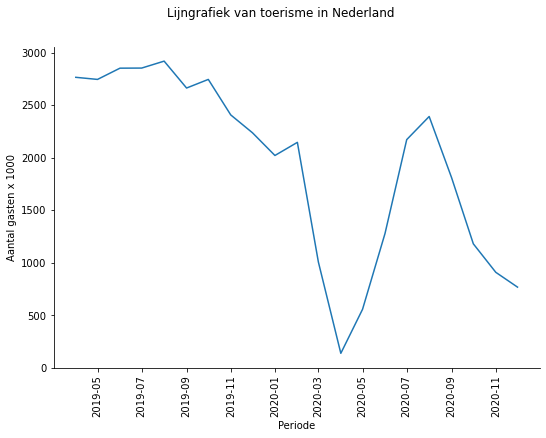

In [31]:
g = sns.relplot(data=df_toerisme, x='Periods', y='Guests (x 1 000)', kind='line', aspect = 1.5)

g.fig.suptitle('Lijngrafiek van toerisme in Nederland', y = 1.08)
g.set(xlabel = 'Periode', ylabel = 'Aantal gasten x 1000')
plt.xticks(rotation=90)

plt.show()

Om het verband met de besmettingen weer te kunnen geven is deze als tweede as toegevoegd in de lijngrafiek. Hieruit blijkt dat de daling van het toerisme in april 2020 te maken heeft met de toename van het aantal besmettingen. Opvallend is dat het toerisme groeit tot het oude niveau, maar niet zo hard meer daalt bij een nieuwe toename van het aantal besmettingen.

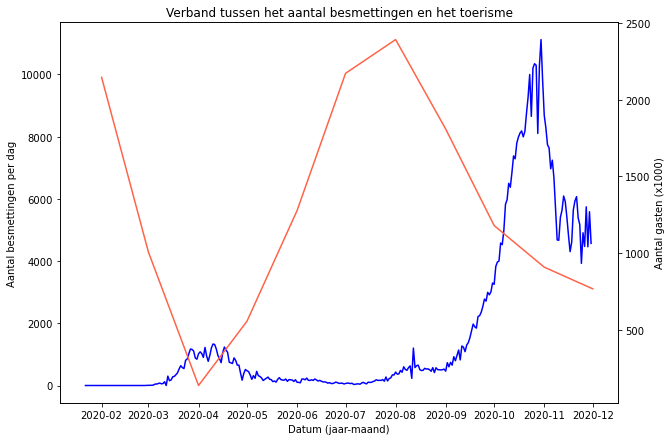

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.lineplot(data=(df_covid_nl_history[df_covid_nl_history['date']<df_toerisme['Periods'].max()]), x='date', y='confirmed per day', color='blue')
plt.xlabel('Datum (jaar-maand)')
plt.ylabel('Aantal besmettingen per dag')
ax2 = plt.twinx()
sns.lineplot(data=(df_toerisme[df_toerisme['Periods']>df_covid_nl_history['date'].min()]), x='Periods', y='Guests (x 1 000)', ax=ax2, color='tomato')
plt.title('Verband tussen het aantal besmettingen en het toerisme')
plt.ylabel('Aantal gasten (x1000)')
plt.show()

### 3.6 Inladen gegevens (faillissementen)
Net als de gegevens van het toerisme hebben we ook een dataset van het aantal faillissementen bij CBS gedownload https://opendata.cbs.nl/statline/#/CBS/en/dataset/82522ENG/line?ts=1614610685490. 

Om een indruk te krijgen van de data hebben we de dataset weergegeven.

In [33]:
df_faillissementen=pd.read_csv('https://opendata.cbs.nl/CsvDownload/csv/82522ENG/TypedDataSet?dl=43B85', sep=';')
df_faillissementen

,Type of bankruptcy,Periods,Regions,Pronounced bankruptcies (Number)
0,Total entities with/without legal pers.,2009 January,Nederland,563
1,Total entities with/without legal pers.,2009 February,Nederland,601
2,Total entities with/without legal pers.,2009 March,Nederland,768
3,Total entities with/without legal pers.,2009 April,Nederland,717
4,Total entities with/without legal pers.,2009 May,Nederland,581
...,...,...,...,...
140,Total entities with/without legal pers.,2020 September,Nederland,248
141,Total entities with/without legal pers.,2020 October,Nederland,184
142,Total entities with/without legal pers.,2020 November,Nederland,203
143,Total entities with/without legal pers.,2020 December**,Nederland,202


Achter sommige data staat een sterretje, wat CBS gebruikt om aan te geven dat de data nog kan wijzigen. Voor de analyse hebben we deze niet nodig en hebben wij deze dus verwijderd. Ook hebben we het datatype gewijzigd naar datetime. Uit de informatie van de dataframe blijkt dat de bewerkingen zijn gelukt en we geen missende data hebben.

In [34]:
df_faillissementen['Periods'] = df_faillissementen['Periods'].str.replace('*', '')
df_faillissementen['Periods']= pd.to_datetime(df_faillissementen['Periods'])
df_faillissementen.head()

,Type of bankruptcy,Periods,Regions,Pronounced bankruptcies (Number)
0,Total entities with/without legal pers.,2009-01-01,Nederland,563
1,Total entities with/without legal pers.,2009-02-01,Nederland,601
2,Total entities with/without legal pers.,2009-03-01,Nederland,768
3,Total entities with/without legal pers.,2009-04-01,Nederland,717
4,Total entities with/without legal pers.,2009-05-01,Nederland,581


In [35]:
df_faillissementen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Type of bankruptcy                145 non-null    object        
 1   Periods                           145 non-null    datetime64[ns]
 2   Regions                           145 non-null    object        
 3   Pronounced bankruptcies (Number)  145 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.7+ KB


### 3.7 Visualisaties faillissementen
We hebben een lijngrafiek weergegeven die het verloop van het aantal faillissementen in Nederland tussen 2009 en 2020 laat zien. Hieruit blijkt dat het aantal faillissementen vooral in 2020 enorm daalt. In de afgelopen 11 jaar is het aantal faillissementen nog nooit zo laag geweest.

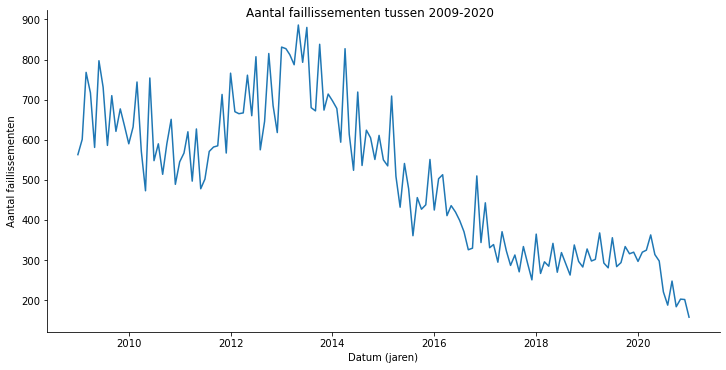

In [36]:
g = sns.relplot(data=df_faillissementen, x='Periods', y='Pronounced bankruptcies (Number)', kind='line', aspect=2)
g.fig.suptitle('Aantal faillissementen tussen 2009-2020')
g.set(xlabel = 'Datum (jaren)', ylabel = 'Aantal faillissementen')
plt.show()

Om in te zoomen op het aantal faillissementen in 2020 hebben we ingezoomed op de gegevens tussen maart 2020 en januari 2021. Het is duidelijk te zien dat in de loop van het jaar 2020 het aantal faillissementen afneemt.

In [37]:
df_faillissementen_2020 = df_faillissementen.loc[df_faillissementen.index > 133]
df_faillissementen_2020.index = df_faillissementen_2020["Periods"]
df_faillissementen_2020.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2020-03-01 to 2021-01-01
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Type of bankruptcy                11 non-null     object        
 1   Periods                           11 non-null     datetime64[ns]
 2   Regions                           11 non-null     object        
 3   Pronounced bankruptcies (Number)  11 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 440.0+ bytes


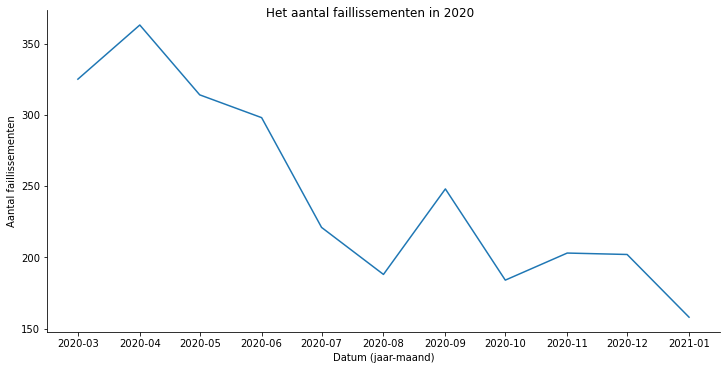

In [38]:
g = sns.relplot(data=df_faillissementen_2020, x='Periods', y='Pronounced bankruptcies (Number)', kind='line', aspect=2)
g.fig.suptitle('Het aantal faillissementen in 2020')
g.set(xlabel = 'Datum (jaar-maand)', ylabel = 'Aantal faillissementen')
plt.show()

Om het verband te kunnen laten zien tussen het aantal faillissementen en het aantal besmettingen hebben we beide variabelen in één grafiek geplaatst. Om de grafiek interactief te kunnen maken, is er een aantal sliders, tekstvelden en keuzemenu's toegevoegd.

Allereerst zal de linker Y-as aan te passen zijn. Deze sliders zijn afhankelijk van elkaar ingesteld. De maximaal gekozen Y-waarde kan nooit groter zijn dan de minimale Y-waarde+100. Door een ruimte van 100 in te stellen, wordt voorkomen dat er een gelijke waarde voor minimale en maximale Y-waarde wordt gekozen.

In [39]:
Cylim_min = ipywidgets.IntSlider(description='Kies minimum Y-waarde COVID-19 infecties', style={'description_width': 'initial'}, min=df_covid_nl_history_confirmed['confirmed per day'].min(), max=df_covid_nl_history_confirmed['confirmed per day'].max()-100, step=50, layout=Layout(width='100%'))
Cylim_max = ipywidgets.IntSlider(description='Kies maximum Y-waarde COVID-19 infecties', style={'description_width': 'initial'}, min=df_covid_nl_history_confirmed['confirmed per day'].min()+100, max=df_covid_nl_history_confirmed['confirmed per day'].max()+100, value=df_covid_nl_history_confirmed['confirmed per day'].max()+100, step=50, layout=Layout(width='100%'))

def on_value_change(change):
    new_Cylim_min = change['new']
    Cylim_max.min = new_Cylim_min + 100
Cylim_min.observe(on_value_change, names='value')

Op een identieke wijze zal de rechter Y-as aan te passen zijn. Hier is wel gekozen voor een kleinere ruimte tussen de minima en maxima, namelijk 10. Dit is vanwege de lagere datawaarden.

In [40]:
Bylim_min = ipywidgets.IntSlider(description='Kies minimum Y-waarde faillissementen', style={'description_width': 'initial'}, min=df_faillissementen_2020["Pronounced bankruptcies (Number)"].min(), max=df_faillissementen_2020["Pronounced bankruptcies (Number)"].max()-1, step=1, layout=Layout(width='100%'))
Bylim_max = ipywidgets.IntSlider(description='Kies maximum Y-waarde faillissementen', style={'description_width': 'initial'}, min=df_faillissementen_2020["Pronounced bankruptcies (Number)"].min()+1, max=df_faillissementen_2020["Pronounced bankruptcies (Number)"].max()+10, value=df_faillissementen_2020["Pronounced bankruptcies (Number)"].max()+10, step=1, layout=Layout(width='100%'))

def on_value_change(change):
    new_Bylim_min = change['new']
    Bylim_max.min = new_Bylim_min + 1
Bylim_min.observe(on_value_change, names='value')

Vervolgens zal er een mogelijkheid worden gegeven om het datumbereik aan te passen. Dit bereik is gelimiteerd tussen de eerste en laatste waarneming in de dataframe.

In [41]:
options = df_faillissementen_2020['Periods']
dateslider = ipywidgets.SelectionRangeSlider(
    options=options,
    index=(0,10),
    description='Selecteer datumbereik',
    disabled=False,
    layout=Layout(width='75%', height='80px'),
    style={'description_width': 'initial'},
    readout=True
)

Ook is het mogelijk om de titel van de grafiek zelf aan te passen. Dit gebeurt middels een tekstveld.

In [42]:
titlebox = ipywidgets.Text(
    placeholder='Kies titel',
    value='Relatie tussen COVID-19 infecties en definitief aantal uitgeroepen faillissementen',
    description='Vul een grafiektitel in:',
    disabled=False,
    style={'description_width': 'initial'}
)

Daarnaast kan de grafiek verder worden aangepast door een eigengekozen kleurstelling toe te passen.

In [43]:
colorCovid = ipywidgets.ColorPicker(
    description = "Kies een kleur voor 'COVID-19 infecties'",
    value = 'blue',
    style={'description_width': 'initial'}
)

colorBankrupt = ipywidgets.ColorPicker(
    description = "Kies een kleur voor 'definitief aantal faillissementen'",
    value = 'tomato',
    style={'description_width': 'initial'}
)

Deze elementen worden vervolgens samengevoegd in een functie. De output bevat alle bovengenoemde elementen en de uiteindelijke grafiek.

In [44]:
def ranges(adjust, adjustLY1, adjustLY2, adjustRY1, adjustRY2, title, colorCovid, colorBankrupt):
    fig, ax = plt.subplots(figsize=(20, 15))
    sns.set_style("ticks")
    br1 = sns.lineplot(data=(df_covid_nl_history[df_covid_nl_history['date']<df_faillissementen_2020['Periods'].max()]), x='date', y='confirmed per day', color=colorCovid)
    ax2 = plt.twinx()
    br2 = sns.lineplot(data=df_faillissementen_2020, x='Periods', y='Pronounced bankruptcies (Number)', ax=ax2, color=colorBankrupt)
    br1.set(ylabel='COVID-19 infecties', xlabel='Date (Months)', title=titlebox.value)
    br2.set(ylabel='Definitief aantal uitgeroepen faillissementen', label='Definitief aantal uitgeroepen faillissementen')
    blue_patch = mpatches.Patch(color=colorCovid, label='COVID-19 infecties')
    tomato_patch = mpatches.Patch(color=colorBankrupt, label='Definitief aantal uitgeroepen faillissementen')
    plt.legend([blue_patch, tomato_patch], ['COVID-19 infecties', 'Definitief aantal uitgeroepen faillissementen'])
    ax.set_xlim([dateslider.value[0], dateslider.value[1]])
    br1.set_ylim([Cylim_min.value, Cylim_max.value])
    br2.set_ylim([Bylim_min.value, Bylim_max.value])

out = ipywidgets.interactive_output(ranges, {'adjust': dateslider, 'adjustLY1':Cylim_min, 'adjustLY2':Cylim_max, 'adjustRY1':Bylim_min, 'adjustRY2':Bylim_max, 'title':titlebox, 'colorCovid':colorCovid, 'colorBankrupt':colorBankrupt})
ipywidgets.VBox([ipywidgets.HBox([dateslider, titlebox]), Cylim_min, Cylim_max, Bylim_min, Bylim_max, out, colorCovid, colorBankrupt])

Conclusie:
Ondanks dat veel mensen verwachten dat corona een negatieve impact heeft op het aantal faillissementen, blijkt dat het aantal faillissementen afneemt als het aantal besmettingen toeneemt. Dit komt waarschijnlijk door de steunmaatregelen van de overheid.